# Diferencias finitas: cálculo numérico de derivadas

En el último notebook, vimos que el método de Newton requiere conocer la derivada de una función.
En este notebook, veremos una manera (no necesariamente la mejor) de calcular derivadas de funciones de forma numérica: las llamadas **diferencias finitas**.

In [1]:
using Plots, LaTeXStrings
pyplot()

Plots.PyPlotBackend()

In [2]:
using Interact

## Derivadas de funciones uni-dimensionales

[1] Considera una función uni-dimensional $f: \mathbb{R} \to \mathbb{R}$, y supón que es suficientemente diferenciable para que las derivadas que tomemos estén definidas [por ejemplo, de clase $C^2$].

Escribe, usando notación LaTeX, la definición de la derivada $f'(a)$ de $f$ en el punto $a$, como límite cuando la variable $h$ tiende a $0$.

$$f'(a) = \lim_{\mathbb{h} \to \mathbb {0}} \frac{f(a + h) - f(a)} {h}$$ 

[2] Desgraciadamente, **no podemos llevar a cabo el proceso de límite en la computadora**. (Intuitivamente, podemos decir que el proceso de límite es **continuo**, mientras que la computadora maneja cantidades **discretas**.)

(i) ¿Cuál solución se te ocurre para esto en términos de la variable $h$? 

La expresión $f(a+h) - f(a)$ se llama una **diferencia para adelante** ("forward difference"), y cuando lo dividimos por $h$ se llama un **cociente de diferencias** ("difference quotient"). 

(ii) ¿Geométricamente, a qué corresponde una diferencia de este tipo? ¿Y un cociente de diferencias?

[3] (i) Escribe una función que implemente una diferencia para adelante para una función $f$, punto $a$ y paso $h$ dadas.

In [3]:
function dif_adelante(f::Function, a::Number, h::FloatRange)
    difer = []
    for i in h
        dif = f(a + i) - f(a)
        push!(difer, dif)
    end
    return difer
end 

dif_adelante (generic function with 1 method)

In [4]:
dif_adelante(x -> x^2, 1.0, 1:0.5:3)

5-element Array{Any,1}:
  3.0 
  5.25
  8.0 
 11.25
 15.0 

In [5]:
#NOOO
#function cociente_difer(f::Function, a::Number, h::Number)
#    difer = []
#    for i in h
#        dif = (f(a + i) - f(a)) / i
#        push!(difer, dif)
#        #@show i f(a + i) - f(a) dif
#    end
#    return difer
#end 

In [6]:
function calculo(f, a, h)
end

function iteracion_arreglo(f)
    hs = logspace(-15, -1, 100)
#     resultados = []
#     for h in hs
#         push!(resultados, calculo(f, 3, h))
#     end
    
    resultados = calculo.([f], 3, hs) #
    
    return (hs, resultados)
end

iteracion_arreglo (generic function with 1 method)

In [7]:
hs, resultados = iteracion_arreglo(x->x^2)
plot(hs, resultados)

LoadError: BoundsError: attempt to access 0-element Array{RecipesBase.RecipeData,1} at index [1]

(ii) Para distintas funciones $f$, grafica la función $f$, su derivada analítica $f'$, y la aproximación a $f'$ usando diferencias finitas.

In [8]:
function cociente_difer(f::Function, a::Number, h)

        dif = (f(a + h) - f(a)) / h
    
    return dif
end 

cociente_difer (generic function with 1 method)


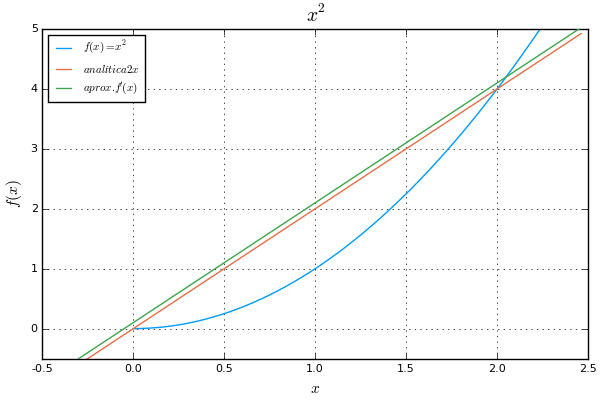

In [9]:
# Se define un rango y h
rango = 1e-4:1e-4:3
h=1e-1

# Gráficas
plot(rango,x->x^2, xlim=(-0.5, 2.5), ylim=(-0.5, 5), xlabel=L"x", ylabel=L"f(x)", title=L"x^2", lab=L"f(x)=x^2") #Función f(x) = x^2
plot!(x->2x, lab=L"analítica 2x") # Derivada analítica de f, f'(x) = 2x
plot!(x->cociente_difer(x->x^2,x,h), lab=L"aprox. f'(x)") # Aproximación de f'(x) usando la función cociente_difer

Interact.Options{:SelectionSlider,Float64}(Signal{Float64}(0.505, nactions=1),"h",0.505,"0.505",Interact.OptionDict(DataStructures.OrderedDict("0.01"=>0.01,"0.011"=>0.011,"0.012"=>0.012,"0.013"=>0.013,"0.014"=>0.014,"0.015"=>0.015,"0.016"=>0.016,"0.017"=>0.017,"0.018"=>0.018,"0.019"=>0.019…),Dict(0.259=>"0.259",0.117=>"0.117",0.849=>"0.849",0.875=>"0.875",0.785=>"0.785",0.89=>"0.89",0.221=>"0.221",0.756=>"0.756",0.658=>"0.658",0.449=>"0.449"…)),Any[],Any[],true,"horizontal")


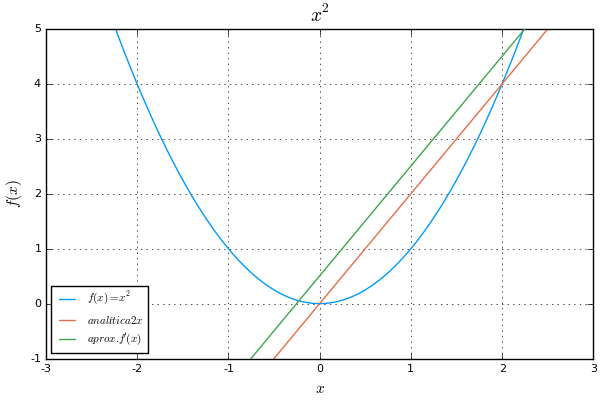

In [10]:
# Usando manipulate

@manipulate for h = 1e-2:1e-3:1
    rangox = -3:5e-2:3
    #rangox = 1e-4:1e-2:3
    # Gráficas
    plot(rangox,x->x^2, xlim=(-3, 3), ylim=(-1.0, 5), xlabel=L"x", ylabel=L"f(x)", title=L"x^2", lab=L"f(x)=x^2") #Función f(x) = x^2
    plot!(x->2x, lab=L"analítica 2x") # Derivada analítica de f, f'(x) = 2x
    plot!(x->cociente_difer(x->x^2,x,h), lab=L"aprox. f'(x)") # Aproximación de f'(x) usando la función cociente_difer
end

Interact.Options{:SelectionSlider,Float64}(Signal{Float64}(0.505, nactions=1),"h",0.505,"0.505",Interact.OptionDict(DataStructures.OrderedDict("0.01"=>0.01,"0.011"=>0.011,"0.012"=>0.012,"0.013"=>0.013,"0.014"=>0.014,"0.015"=>0.015,"0.016"=>0.016,"0.017"=>0.017,"0.018"=>0.018,"0.019"=>0.019…),Dict(0.259=>"0.259",0.117=>"0.117",0.849=>"0.849",0.875=>"0.875",0.785=>"0.785",0.89=>"0.89",0.221=>"0.221",0.756=>"0.756",0.658=>"0.658",0.449=>"0.449"…)),Any[],Any[],true,"horizontal")


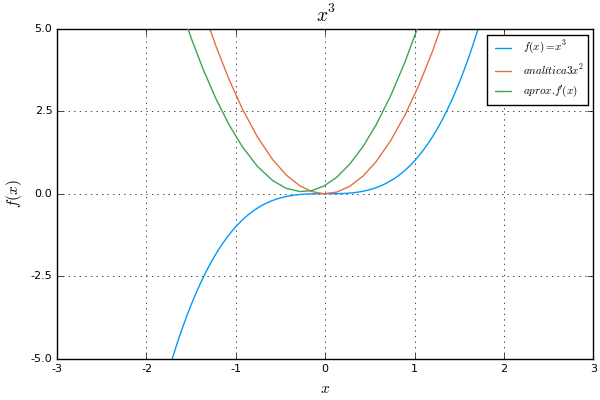

In [11]:
# Usando otra función 
@manipulate for h = 1e-2:1e-3:1
    rangox = -3:5e-2:3
    #rangox = 1e-4:1e-2:3
    # Gráficas
    plot(rangox,x->x^3, xlim=(-3, 3), ylim=(-5, 5), xlabel=L"x", ylabel=L"f(x)", title=L"x^3", lab=L"f(x)=x^3") #Función f(x) = x^2
    plot!(x->3x^2, lab=L"analítica 3x^2") # Derivada analítica de f, f'(x) = 2x
    plot!(x->cociente_difer(x->x^3,x,h), lab=L"aprox. f'(x)") # Aproximación de f'(x) usando la función cociente_difer
end

[4] (i) Calcula el error desde el valor analítico que se comete al utilizar la aproximación de la derivada al tomar una $f$ y $a$ dadas, y variar $h$, usando la función `logspace` para que los valores de $h$ estén espaciados de forma logarítmica. Hazlo para diferentes funciones. (¡Escribe una función que haga el cálculo!) ¿Qué podría causar este efecto?

In [23]:
hs = logspace(0, -10, 100);

In [13]:
f(x) = x^2;
fp(x) = 2x;

In [14]:
function errores(f::Function, fp, a::Number)
    #h = 
    hs = logspace(-5, 5, 10)
    e = []
    for i in hs
        err = cociente_difer(f, a, hs) - fp(a)
        push!(e, err)
    end
    return e
end

errores (generic function with 1 method)

In [24]:
erroresD = cociente_difer.([f], 3, hs) - fp(3)

100-element Array{Float64,1}:
  1.0       
  0.792483  
  0.628029  
  0.497702  
  0.394421  
  0.312572  
  0.247708  
  0.196304  
  0.155568  
  0.123285  
  0.097701  
  0.0774264 
  0.0613591 
  ⋮         
  7.89893e-8
  9.60401e-7
 -8.3322e-7 
 -2.13278e-7
  5.05981e-7
 -9.09132e-7
  3.48844e-6
  4.01328e-8
  3.75632e-6
 -3.50977e-6
  8.95138e-6
  4.96442e-7


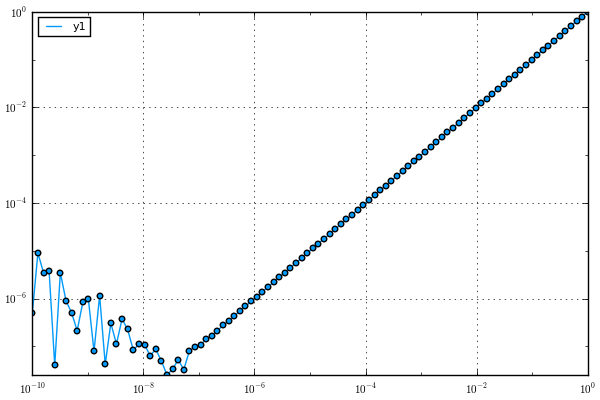

In [25]:
plot(hs, abs.(erroresD), m="x", xscale=:log10, yscale=:log10)

In [16]:
f1(x) = x^2
f1p(x) = 2x
errores(f1, f1p, 3);

LoadError: MethodError: no method matching *(::Array{Float64,1}, ::Array{Float64,1})[0m
Closest candidates are:
  *(::Any, ::Any, [1m[31m::Any[0m, [1m[31m::Any...[0m) at operators.jl:138
  *{T<:Union{Complex{Float32},Complex{Float64},Float32,Float64},S}([1m[31m::Union{Base.ReshapedArray{T<:Union{Complex{Float32},Complex{Float64},Float32,Float64},2,A<:DenseArray,MI<:Tuple{Vararg{Base.MultiplicativeInverses.SignedMultiplicativeInverse{Int64},N}}},DenseArray{T<:Union{Complex{Float32},Complex{Float64},Float32,Float64},2},SubArray{T<:Union{Complex{Float32},Complex{Float64},Float32,Float64},2,A<:Union{Base.ReshapedArray{T,N,A<:DenseArray,MI<:Tuple{Vararg{Base.MultiplicativeInverses.SignedMultiplicativeInverse{Int64},N}}},DenseArray},I<:Tuple{Vararg{Union{Base.AbstractCartesianIndex,Colon,Int64,Range{Int64}},N}},L}}[0m, ::Union{Base.ReshapedArray{S,1,A<:DenseArray,MI<:Tuple{Vararg{Base.MultiplicativeInverses.SignedMultiplicativeInverse{Int64},N}}},DenseArray{S,1},SubArray{S,1,A<:Union{Base.ReshapedArray{T,N,A<:DenseArray,MI<:Tuple{Vararg{Base.MultiplicativeInverses.SignedMultiplicativeInverse{Int64},N}}},DenseArray},I<:Tuple{Vararg{Union{Base.AbstractCartesianIndex,Colon,Int64,Range{Int64}},N}},L}}) at linalg/matmul.jl:79
  *([1m[31m::Base.LinAlg.AbstractTriangular{T,S<:AbstractArray{T,2}}[0m, ::AbstractArray{T,1}) at linalg/triangular.jl:1496
  ...[0m

(ii) ¿Para qué clase de funciones será el resultado exacto? Demuéstralo gráficamente. Así, qué tipo de **aproximación local** de la función estamos usando? 

[5] (i) Desarrolla $f(a + h)$ en una serie de Taylor con término complementario de Lagrange. Así, rederiva la expresión aproximada que ya obtuviste para la derivada, pero ahora con información *analítica* sobre **el tamaño del error** que cometes cuando utilizas esta aproximación (asintóticamente cuando $h \to 0$). Si el error va como $C.h^n$, con $C$ una constante, entonces escribimos $\mathcal{O}(h^n)$. 

(ii) Verifica que coinicide con lo que encontraste numéricamente.

[6] Una mejor aproximación (¿a qué nos referimos con eso?) es la **diferencia centrada**: expande $f(a+h)$ y $f(a - h)$ en series de Taylor separadas. Así, deriva una mejor aproximación a la primera derivada. Calcula su error y chécalo numéricamente.  ¿Para qué tipo de funciones es exacta? 

[7] Encuentra una aproximación para la segunda derivada y encuentra su error; chécalo numéricamente. 

## Funciones multi-dimensionales 

Ahora consideremos una función $f: \mathbb{R}^2 \to \mathbb{R}$ y $g: \mathbb{R}^2 \to \mathbb{R}^2$.

[8] ¿Qué tipo de derivadas quisiéramos poder calcular para $f$ y $g$? ¿Cómo podemos utilizar lo que ya hicimos para funciones uni-dimensionales para aplicarlo directamente a $f$ y $g$?

[9] Impleméntalo y compara con funciones cuyas derivadas conoces analíticamente.

## De regreso al método de Newton

[10] Utiliza una diferencia finita, con una $h$ pequeña, para aproximar la derivada en el método de Newton. ¿Cómo afecta el utilizar una aproximación de la derivada, en lugar del valor exacto, en la tasa de convergencia? Compara los resultados al utilizar los dos tipos de diferencias finitas (para adelante y centrada).

In [17]:
M = [1 2 0
     1 2 1
     2 2 0]

3×3 Array{Int64,2}:
 1  2  0
 1  2  1
 2  2  0


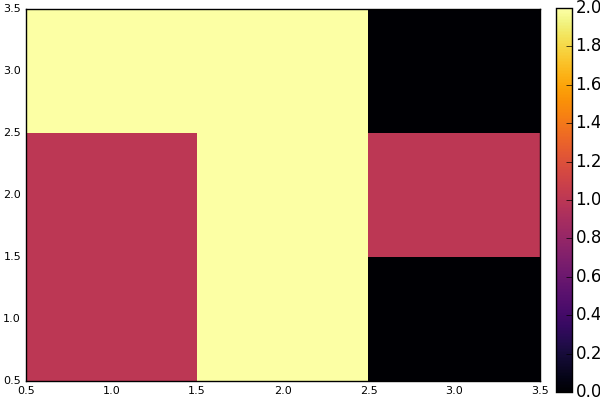

/usr/local/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


In [18]:
heatmap(M)